In [91]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

import warnings
warnings.filterwarnings('ignore')

In [92]:
import os
os.getcwd()

'/Users/applemacbook/Desktop/machinelearning'

In [93]:
# Read the train and test data

data_train_work = pd.read_csv("train_work.csv")
data_train_attrition = pd.read_csv("train_attrition.csv")

data_test_work = pd.read_csv("test_work.csv")
data_employee_history = pd.read_csv("employee_data2.csv")

In [94]:
# Grouping all the employees of train data as the employee id is not unique
data_train_work = data_train_work.groupby(['EmployeeID']).agg('sum')

In [95]:
# Grouping all the employees for test data as employee id is not unique
data_test_work = data_test_work.groupby(['EmployeeID']).agg('sum')

In [96]:
# combine all job history in to numeric data
data_employee_history.Job_History = data_employee_history.Job_History.str.strip().str.split(',').apply(len)

In [97]:
# Change joining date to number of years of experience to check the dependency
data_employee_history.Joining_Date = data_employee_history.Joining_Date.str.split('_').str[0]

In [98]:
data_employee_history.Joining_Date = data_employee_history.Joining_Date.astype('int64')

In [99]:
data_employee_history.Joining_Date =  2019 - data_employee_history.Joining_Date

In [100]:
data_employee_history.dtypes

EmployeeID      object
Job_History      int64
Joining_Date     int64
Designation     object
Sex              int64
dtype: object

In [101]:
#top 5 rows
data_employee_history.head()

,EmployeeID,Job_History,Joining_Date,Designation,Sex
0,emp-10,4,13,VP,0
1,emp-108,4,7,VP,1
2,emp-115,5,7,Senior,1
3,emp-121,6,7,VP,1
4,emp-138,5,7,Senior,1


In [102]:
#top 5 rows
data_employee_history.head()

,EmployeeID,Job_History,Joining_Date,Designation,Sex
0,emp-10,4,13,VP,0
1,emp-108,4,7,VP,1
2,emp-115,5,7,Senior,1
3,emp-121,6,7,VP,1
4,emp-138,5,7,Senior,1


In [103]:
#data types
data_employee_history.dtypes

EmployeeID      object
Job_History      int64
Joining_Date     int64
Designation     object
Sex              int64
dtype: object

In [104]:
# Check the columns
data_train_work.columns

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent'],
      dtype='object')

In [105]:
#display column names
data_train_attrition.columns

Index(['EmployeeID', 'Left_Company'], dtype='object')

In [106]:
#display column names
data_employee_history.columns

Index(['EmployeeID', 'Job_History', 'Joining_Date', 'Designation', 'Sex'], dtype='object')

In [107]:
# Merge the data set two at a time

data_train_1 = data_train_work.merge(data_employee_history,on=['EmployeeID'])

data_train_1.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Job_History',
       'Joining_Date', 'Designation', 'Sex'],
      dtype='object')

In [108]:
#merging the merged one with the other one
data_train = data_train_1.merge(data_train_attrition, on=['EmployeeID'])

In [109]:
#merging the test data
data_test = data_test_work.merge(data_employee_history, on=['EmployeeID'])

In [110]:
#top 5 rows
data_train.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex,Left_Company
0,emp-1,3424.0,2462.0,408.0,2462.0,42,2849,3,8,MD,1,0.0
1,emp-10,2006.0,1274.0,328.0,691.0,13,616,4,13,VP,0,1.0
2,emp-100,3607.0,3275.0,224.0,3235.0,23,3388,2,8,Senior,1,0.0
3,emp-101,4109.5,2759.5,192.0,0.0,18,1953,3,7,Senior,1,0.0
4,emp-102,3790.0,2720.5,344.0,1861.0,20,2254,1,8,Senior,1,0.0


In [111]:
#data types
data_train.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
Job_History            int64
Joining_Date           int64
Designation           object
Sex                    int64
Left_Company         float64
dtype: object

In [112]:
#data types
data_train.describe()

,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Sex,Left_Company
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,3061.481224,2097.439592,261.702041,1063.230612,20.510204,1534.514286,2.771429,8.240816,0.881633,0.110204
std,1377.138318,1149.058255,146.644543,1077.686591,12.461288,1078.828104,1.433213,1.959416,0.323704,0.313785
min,90.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000
25%,1986.299999,1090.000000,145.500000,80.500000,11.000000,686.000000,2.000000,7.000000,1.000000,0.000000
50%,3180.000000,2145.500000,256.000000,720.000000,20.000000,1400.000000,3.000000,8.000000,1.000000,0.000000
75%,4228.000000,3158.000000,388.000000,1695.500000,28.000000,2324.000000,4.000000,9.000000,1.000000,0.000000
max,5406.900000,4279.500000,616.500000,3857.000000,78.000000,4113.000000,7.000000,17.000000,1.000000,1.000000


In [113]:
#decsribe of all numerical and categorical data
data_train.describe(include='object')

,EmployeeID,Designation
count,245,245
unique,245,5
top,emp-291,Junior
freq,1,79


Observation:
1. Employee Id column can be dropped as it is not relating anything
2. There are more junior emplyees in the organization
3. More numer of people has joined the organization in 2012_05
4. Job history column can be split based on the number of company he has worked
5. Sex and left company needs to be categorical

In [114]:
#value counts of designation
data_train.Designation.value_counts()

Junior    79
VP        63
Senior    63
EVP       28
MD        12
Name: Designation, dtype: int64

In [115]:
# Check for the null values in train
data_train.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
Left_Company         0
dtype: int64

In [116]:
# Check for the null values in test
data_test.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
dtype: int64

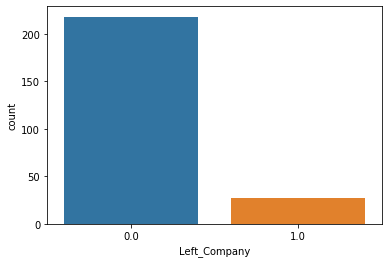

0.0    218
1.0     27
Name: Left_Company, dtype: int64


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Left_Company',data=data_train)
plt.show()

# What are the counts?
print(data_train.Left_Company.value_counts())

left_company = len(data_train[data_train.Left_Company == '1'])
Not_left = len(data_train[data_train.Left_Company != '0'])

From the distribution, It seems like around 12% of employees have left company. Possible chances of class imbalance

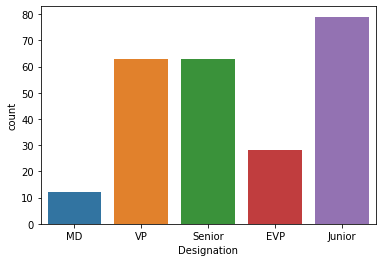

Junior    79
VP        63
Senior    63
EVP       28
MD        12
Name: Designation, dtype: int64

In [118]:
sns.countplot(x="Designation", data=data_train)
plt.show()

data_train.Designation.value_counts()

Interestingly VP is high and the maximum number of Junior employees

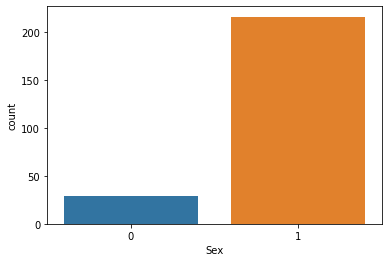

1    216
0     29
Name: Sex, dtype: int64

In [119]:
sns.countplot(x="Sex", data=data_train)
plt.show()

data_train.Sex.value_counts()

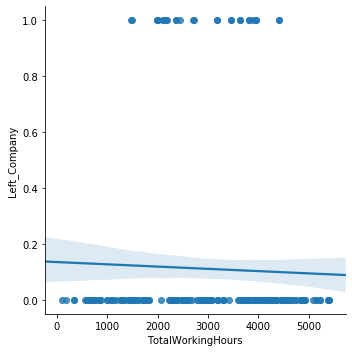

In [120]:
sns.lmplot(x='TotalWorkingHours', y='Left_Company', data=data_train)

plt.show()


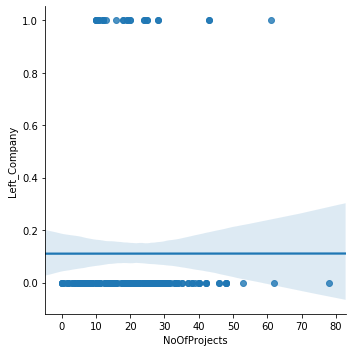

In [121]:
sns.lmplot(x='NoOfProjects', y='Left_Company', data=data_train)

plt.show()

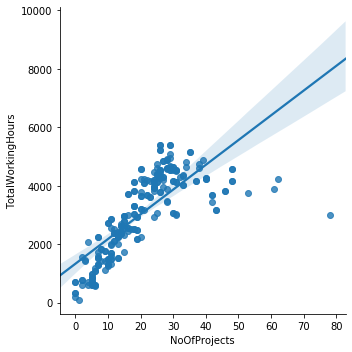

In [122]:
sns.lmplot(x='NoOfProjects', y='TotalWorkingHours', data=data_train)

plt.show()

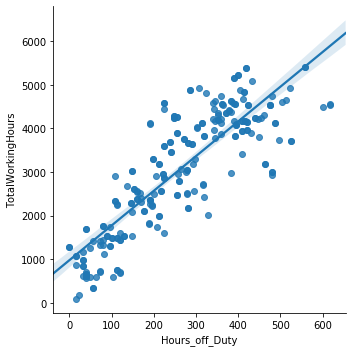

In [123]:

#lineraly dependent variable
sns.lmplot(x='Hours_off_Duty', y='TotalWorkingHours', data=data_train)

plt.show()

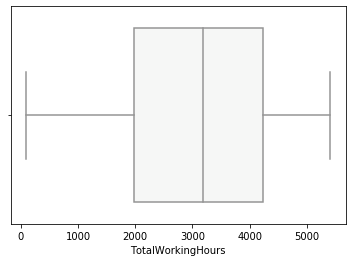

In [124]:
#Hours of duty incerases with total working hours 
sns.boxplot(x="TotalWorkingHours", data=data_train, palette="PRGn")
plt.show()

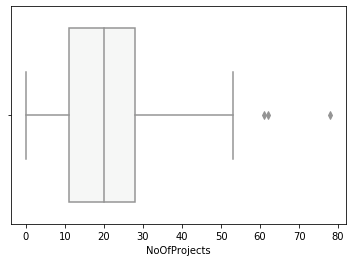

In [125]:
#outliers detected
sns.boxplot(x="NoOfProjects", data=data_train, palette="PRGn")
plt.show()

In [126]:
data_train.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
Job_History            int64
Joining_Date           int64
Designation           object
Sex                    int64
Left_Company         float64
dtype: object

Feature Engineering


2. Already summed all the variables based on the employee id
3. Job history column is transformed to know number of companies the employee worked in the past
4. Joining Date is transformed to numer of years of experience in the  company

2, 3, 4 Feature engineering is performed at the begining

In [127]:
data_train.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
Job_History            int64
Joining_Date           int64
Designation           object
Sex                    int64
Left_Company         float64
dtype: object

In [128]:
data_train.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
Left_Company         0
dtype: int64

In [129]:
# Convert to categorical variable
for x in ['EmployeeID','Designation','Sex','Left_Company']:
    data_train[x] = data_train[x].astype('category')

for x in ['EmployeeID','Designation','Sex']:
    data_test[x] = data_test[x].astype('category')


In [130]:
# Split Numeric and Categorical value
# Split Numeric and Categorical variable

cat_attr = list(data_train.select_dtypes("category").columns)
num_attr = list(data_train.columns.difference(cat_attr))

cat_attr.pop()

'Left_Company'

In [131]:
cat_attr

['EmployeeID', 'Designation', 'Sex']

In [132]:
num_attr

['ActualTimeSpent',
 'Billable_Hours',
 'Hours_off_Duty',
 'Job_History',
 'Joining_Date',
 'NoOfProjects',
 'TotalWorkingHours',
 'Touring_Hours']

In [133]:
# Check for missing values

data_train.isnull().sum()

EmployeeID           0
TotalWorkingHours    0
Billable_Hours       0
Hours_off_Duty       0
Touring_Hours        0
NoOfProjects         0
ActualTimeSpent      0
Job_History          0
Joining_Date         0
Designation          0
Sex                  0
Left_Company         0
dtype: int64

In [134]:
data_train.head(10)

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex,Left_Company
0,emp-1,3424.000000,2462.000000,408.0,2462.0,42,2849,3,8,MD,1,0.0
1,emp-10,2006.000000,1274.000000,328.0,691.0,13,616,4,13,VP,0,1.0
2,emp-100,3607.000000,3275.000000,224.0,3235.0,23,3388,2,8,Senior,1,0.0
3,emp-101,4109.500000,2759.500000,192.0,0.0,18,1953,3,7,Senior,1,0.0
4,emp-102,3790.000000,2720.500000,344.0,1861.0,20,2254,1,8,Senior,1,0.0
5,emp-103,3191.500000,2797.000000,213.0,2797.0,20,2366,4,8,Senior,1,0.0
6,emp-104,3906.000000,3279.000000,256.0,3006.0,24,1715,1,8,Senior,1,0.0
7,emp-105,3301.000000,2169.000000,198.0,1203.0,18,553,2,7,VP,1,0.0
8,emp-107,2241.500000,798.000000,196.0,798.0,7,245,4,7,EVP,1,0.0
9,emp-108,2715.599998,1059.099998,316.0,0.0,10,735,4,7,VP,1,1.0


In [135]:
data_train.groupby('Left_Company').mean()

,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date
Left_Company,,,,,,,,
0.0,3078.671560,2128.448624,257.307339,1062.675688,20.509174,1552.426606,2.463303,8.123853
1.0,2922.685185,1847.070370,297.185185,1067.711111,20.518519,1389.888889,5.259259,9.185185


Important observation

**Employee spent more years in the company, changed multiple companies in the past and Hours_off_duty seems to be leaving company

In [136]:
# Scaling and Imputing using the data, Keeping Imputer if the model goes to production

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [137]:

clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [138]:
# Split X and y varaible
X = data_train.loc[:,data_train.columns!='Left_Company']
y=data_train.loc[:,data_train.columns=='Left_Company']

In [139]:
#Performing train test split on the data using stratify sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [140]:
print(X_train.shape)
print(y_train.shape)

(196, 11)
(196, 1)


In [141]:
#Build the model

clf_logreg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [142]:
#Validating the data on train set
train_pred = clf_logreg.predict(X_train)
print(clf_logreg.score(X_train, y_train))
print(confusion_matrix(y_true=y_train, y_pred = train_pred))

0.9693877551020408
[[174   0]
 [  6  16]]


In [143]:
#Validating the data on validation set
valid_pred = clf_logreg.predict(X_test)
print(clf_logreg.score(X_test, y_test))
print(confusion_matrix(y_true=y_test, y_pred = valid_pred))

0.9795918367346939
[[44  0]
 [ 1  4]]


The logistic regression model seems to have no underfitting or overfitting problem after validating the train and test data set

In [144]:
test_pred = clf_logreg.predict(data_test)


In [145]:
df=pd.DataFrame(test_pred)

In [146]:
df.shape

(51, 1)

In [147]:
df = df.rename(columns={"0":"Left_Company"})

In [148]:
df.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [149]:
data_test.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex
0,emp-106,3309.5,2352.0,298.0,2.0,18,1736,4,7,Senior,0
1,emp-112,3178.5,2610.0,292.0,325.0,21,1708,3,7,VP,1
2,emp-114,3072.5,1618.7,264.0,1104.0,25,882,3,7,EVP,1
3,emp-118,2400.0,2008.0,146.0,728.0,18,1526,2,7,EVP,1
4,emp-12,4491.0,2653.0,601.0,799.0,31,1883,2,13,VP,1


In [150]:
data_final = pd.merge(data_test, df, left_index=True, right_index=True)

In [151]:
data_final.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex,0
0,emp-106,3309.5,2352.0,298.0,2.0,18,1736,4,7,Senior,0,0.0
1,emp-112,3178.5,2610.0,292.0,325.0,21,1708,3,7,VP,1,0.0
2,emp-114,3072.5,1618.7,264.0,1104.0,25,882,3,7,EVP,1,0.0
3,emp-118,2400.0,2008.0,146.0,728.0,18,1526,2,7,EVP,1,0.0
4,emp-12,4491.0,2653.0,601.0,799.0,31,1883,2,13,VP,1,0.0


In [152]:
data_test_attrition = pd.read_csv("test_attrition.csv")

In [153]:

data_test_attrition = data_test_attrition.merge(data_final,on=['EmployeeID'])

In [90]:
data_test_attrition.to_csv(r'C:\Users\applemacbook⁩\Desktop\machinelearning⁩\Logistic_output.csv', index=False,header=False)

In [69]:
#Decision_tree_Started
X_train.dtypes

EmployeeID           category
TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects            int64
ActualTimeSpent         int64
Job_History             int64
Joining_Date            int64
Designation          category
Sex                  category
dtype: object

In [70]:
%%time
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [3,4,5,6,8,9,10,12], 
                 "classifier__min_samples_split": [2,3,4,10,20],"classifier__min_samples_leaf": [1, 5,7,8,9,10]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,y_train)

CPU times: user 1min 22s, sys: 603 ms, total: 1min 23s
Wall time: 1min 25s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [81]:
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 3,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

In [72]:
train_pred = dt_grid.predict(X_train)

In [73]:
valid_pred = dt_grid.predict(X_test)

In [74]:
print(dt_grid.score(X_test, y_test))

1.0


In [75]:
# Predict on unseen data

test_pred = dt_grid.predict(data_test)

In [76]:
df=pd.DataFrame(test_pred)

In [77]:
df.head(3)

,0
0,0.0
1,0.0
2,0.0


In [78]:
data_final = pd.merge(data_test, df, left_index=True, right_index=True)

In [79]:
data_final.head(3)

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex,0
0,emp-106,3309.5,2352.0,298.0,2.0,18,1736,4,7,Senior,0,0.0
1,emp-112,3178.5,2610.0,292.0,325.0,21,1708,3,7,VP,1,0.0
2,emp-114,3072.5,1618.7,264.0,1104.0,25,882,3,7,EVP,1,0.0


In [83]:
data_test_attrition = data_test_attrition.merge(data_final,on=['EmployeeID'])

In [84]:
data_test_attrition = pd.read_csv("test_attrition.csv")

In [85]:
data_test_attrition.head()

,EmployeeID,Left_Company
0,emp-106,NaN
1,emp-112,NaN
2,emp-114,NaN
3,emp-118,NaN
4,emp-12,NaN


In [86]:

data_test_attrition = data_test_attrition.merge(data_final,on=['EmployeeID'])

In [87]:
data_test_attrition.head()

,EmployeeID,Left_Company,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Job_History,Joining_Date,Designation,Sex,0
0,emp-106,NaN,3309.5,2352.0,298.0,2.0,18,1736,4,7,Senior,0,0.0
1,emp-112,NaN,3178.5,2610.0,292.0,325.0,21,1708,3,7,VP,1,0.0
2,emp-114,NaN,3072.5,1618.7,264.0,1104.0,25,882,3,7,EVP,1,0.0
3,emp-118,NaN,2400.0,2008.0,146.0,728.0,18,1526,2,7,EVP,1,0.0
4,emp-12,NaN,4491.0,2653.0,601.0,799.0,31,1883,2,13,VP,1,0.0


In [88]:
data_test_attrition.to_csv(r'C:\Users\applemacbook⁩\Desktop\machinelearning⁩\DecisionTree_output.csv', index=False,header=False)



In [89]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_true=y_train, y_pred=train_pred, average='weighted')
print("F1_Score train", f1_train)

f1_test = f1_score(y_true=y_test, y_pred=valid_pred, average='weighted')
print("F1_Score train", f1_train)

F1_Score train 0.9612594485833923
F1_Score train 0.9612594485833923


In [166]:
#Gradient Boosting
#%%time
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('GBM',GradientBoostingClassifier())])

In [167]:
%%time
gbm_param_grid = {'GBM__max_depth': [8,10,12,14], 'GBM__subsample': [0.8, 0.6,], 'GBM__max_features':[0.2, 0.3], 
              'GBM__n_estimators': [10, 20, 30]}

gbm_grid = GridSearchCV(clf, param_grid=gbm_param_grid, cv=3)

gbm_grid.fit(X_train,y_train)

CPU times: user 11.1 s, sys: 147 ms, total: 11.3 s
Wall time: 11.9 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                    

In [168]:
gbm_grid.best_params_

{'GBM__max_depth': 8,
 'GBM__max_features': 0.3,
 'GBM__n_estimators': 10,
 'GBM__subsample': 0.8}

In [171]:
train_pred = gbm_grid.predict(X_train)
test_pred = gbm_grid.predict(X_test)

print(gbm_grid.score(X_train, y_train))
print(gbm_grid.score(X_test, y_test))

#### Using the function to calculate accuracy, precision and recall.

#accuracy_precision_recall_metrics(y_true = y_test, y_pred = test_pred)

0.9948979591836735
1.0


In [170]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_true=y_train, y_pred=train_pred, average='weighted')
print("F1_Score train", f1_train)

f1_test = f1_score(y_true=y_test, y_pred=valid_pred, average='weighted')
print("F1_Score train", f1_train)

F1_Score train 0.9948459426417333
F1_Score train 0.9948459426417333


In [189]:
ans=gbm_grid.predict(data_test_attrition)

In [190]:
ans

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [179]:
sample=pd.read_csv("sample_submission-1566542168377 (1).csv")

In [191]:
sample['Left_Company']=ans

In [195]:
df=pd.DataFrame(ans)

In [194]:
ans.to_csv(r'C:\Users\applemacbook⁩\Desktop\machinelearning⁩\gradient_boosting_latest_output.csv', index=False,header=False)
